<a href="https://colab.research.google.com/github/Raynaldiilhamnp/EDA-studi-kasus-03-kelompok-09/blob/main/EDA_Studi_Kasus_03_Kelompok_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Study Case 03

Kelompok 09 

**Ketua Kelompok**
*   Raynaldi Ilham Nanda Nur Pratama - 11210940000055

Anggota 
*   Noval Firdaus Ramadhan - 11210940000043  
*   Yeni Riska Amalia - 11210940000051
*   Riesma Ayu Chikharatti - 11210940000053
*   Alfathamdi Putra Umaryadi - 11210940000054
*   Ulya Salsabila - 11210940000074
*   Nayla Sa'adah Fiddaraeni - 11210940000082

# Data

**1. Import Data**

Data diakses dari github, lalu di sambungkan ke google colabs menggunakan fungsi pd.read_csv, data yang diakses ada beberapa kota yaitu kota Jakarta, Bogor, dan Bekasi.

In [ ]:
# Loading Data:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
try: # Running Locally, yakinkan "file_" berada di folder "data"
    jakarta = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    bogor = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    bekasi = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bekasi.csv
    jakarta = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    bogor = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    bekasi = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
jakarta.shape, bogor.shape, bekasi.shape

--2022-10-26 04:36:21--  https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65115 (64K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  63.59K  --.-KB/s    in 0.02s   

2022-10-26 04:36:21 (3.87 MB/s) - ‘data/jakarta.csv’ saved [65115/65115]

--2022-10-26 04:36:21--  https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bogor.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 

((1024, 26), (999, 26), (992, 26))

Terdapat hasil jumlah data baris dan kolom data yang belum dibersihkan dan dirapikan. Yaitu 1024 baris dan 26 kolom untuk kota Jakarta, 999 baris dan 26 kolom untuk kota Bogor, dan 992 baris dan 26 kolom untuk kota Bekasi.

In [ ]:
jakarta = pd.DataFrame(jakarta)
bogor = pd.DataFrame(bogor)
bekasi = pd.DataFrame(bekasi)

In [ ]:
jakarta.info(), bogor.info(), bekasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

(None, None, None)

In [ ]:
jakarta.describe().transpose(), 

(             count          mean           std          min           25%  \
 LT           121.0  2.475868e+02  3.683846e+02         16.0  8.400000e+01   
 LB           121.0  2.794959e+02  2.852756e+02         21.0  9.700000e+01   
 KT           121.0  4.272727e+00  1.901754e+00          1.0  3.000000e+00   
 KM           121.0  3.380165e+00  1.709075e+00          1.0  2.000000e+00   
 garasi        44.0  1.863636e+00  1.518734e+00          1.0  1.000000e+00   
 carport       90.0  1.955556e+00  1.475730e+00          1.0  1.000000e+00   
 listrik      120.0  5.425000e+03  7.891590e+03        900.0  2.200000e+03   
 harga        121.0  8.985955e+09  1.587610e+10  380000000.0  1.600000e+09   
 Unnamed: 14    0.0           NaN           NaN          NaN           NaN   
 Unnamed: 15    0.0           NaN           NaN          NaN           NaN   
 Unnamed: 16    0.0           NaN           NaN          NaN           NaN   
 Unnamed: 17    0.0           NaN           NaN          NaN    

In [ ]:
bogor.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,193.0,1.435751e+02,1.915762e+02,30.0,66.0,84.0,1.200000e+02,1.500000e+03
LB,193.0,9.866321e+01,1.258517e+02,21.0,36.0,58.0,9.000000e+01,1.200000e+03
KT,193.0,2.694301e+00,1.110939e+00,1.0,2.0,2.0,3.000000e+00,8.000000e+00
KM,193.0,1.797927e+00,1.175087e+00,1.0,1.0,1.0,2.000000e+00,6.000000e+00
garasi,193.0,1.554404e-01,4.859312e-01,0.0,0.0,0.0,0.000000e+00,3.000000e+00
carport,193.0,1.310881e+00,9.052715e-01,0.0,1.0,1.0,1.000000e+00,8.000000e+00
listrik,193.0,2.076166e+03,1.562634e+03,900.0,1300.0,1300.0,2.200000e+03,1.760000e+04
harga,193.0,1.289362e+09,2.115854e+09,65000000.0,399000000.0,670000000.0,1.250000e+09,1.650000e+10
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bekasi.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,107.0,1.088224e+02,5.916491e+01,36.0,72.0,91.0,1.305000e+02,3.640000e+02
LB,107.0,1.106355e+02,7.175527e+01,30.0,60.0,90.0,1.440000e+02,4.940000e+02
KT,107.0,2.962617e+00,1.027226e+00,1.0,2.0,3.0,4.000000e+00,7.000000e+00
KM,106.0,1.943396e+00,8.488669e-01,1.0,1.0,2.0,2.750000e+00,4.000000e+00
garasi,33.0,1.090909e+00,2.919371e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
carport,81.0,1.086420e+00,2.827336e-01,1.0,1.0,1.0,1.000000e+00,2.000000e+00
listrik,101.0,2.056436e+03,9.695789e+02,900.0,1300.0,2200.0,2.200000e+03,5.500000e+03
harga,107.0,1.074823e+09,7.516152e+08,160000000.0,580500000.0,920000000.0,1.350000e+09,4.500000e+09
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melakukan statistika deskriptif masing masing kota untuk menggambarkan jumlah, rata rata, standar deviasi, kuartil 1, 2, dan 3, minimal serta maksimal. Masing masing komponen mmemberikan gambaran mengenai variabel atau data yang digunakan dan diproses.

# Preprocessing

**2. Data Preprocessing**

In [ ]:
#menghapus kolom yang berisi data NaN
jakarta.drop(["created_at", "hadap", "Unnamed: 14",'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','URL','sertifikat', 'deskripsi','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)


In [ ]:
bogor.drop(["created_at", "hadap","Unnamed: 14",'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20','URL','sertifikat', 'deskripsi', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)


In [ ]:
bekasi.drop(["created_at", "hadap","Unnamed: 14",'Unnamed: 14','URL','sertifikat', 'deskripsi', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)


In [ ]:
jakarta.drop_duplicates(inplace = True)
print(jakarta.shape)
jakarta.duplicated().sum()

(122, 9)


0

# Visualisasi

Untuk merapikan data yang berisikan NaN kita menghapus kolom yang berisikan data NaN dengan menggunakan fungsi drop_duplicates. Selanjutnya kita menggunakan fungsi isnull().sum() untuk merubah data Nan menjadi 0

In [ ]:
null = jakarta["KT"].isnull()
jakarta["KT"] = jakarta["KT"].replace(np.nan, 0)
null = jakarta["KM"].isnull()
jakarta["KM"] = jakarta["KM"].replace(np.nan, 0)
null = jakarta["garasi"].isnull()
jakarta["garasi"] = jakarta["garasi"].replace(np.nan, 0)
null = jakarta["carport"].isnull()
jakarta["carport"] = jakarta["carport"].replace(np.nan, 0)
null = jakarta["listrik"].isnull()
jakarta["listrik"] = jakarta["listrik"].replace(np.nan, 0)


mean = jakarta["LB"].mean()
jakarta["LB"] = jakarta["LB"].replace(np.nan, mean)
mean = jakarta["LT"].mean()
jakarta["LT"] = jakarta["LT"].replace(np.nan, mean)
mean = jakarta["harga"].mean()
jakarta["harga"] = jakarta["harga"].replace(np.nan, mean)


jakarta

In [ ]:
null = bogor["KT"].isnull()
bogor["KT"] = bogor["KT"].replace(np.nan, 0)
null = bogor["KM"].isnull()
bogor["KM"] = bogor["KM"].replace(np.nan, 0)
null = bogor["garasi"].isnull()
bogor["garasi"] = bogor["garasi"].replace(np.nan, 0)
null = bogor["carport"].isnull()
bogor["carport"] = bogor["carport"].replace(np.nan, 0)
null = bogor["listrik"].isnull()
bogor["listrik"] = bogor["listrik"].replace(np.nan, 0)


mean = bogor["LB"].mean()
bogor["LB"] = bogor["LB"].replace(np.nan, mean)
mean = bogor["LT"].mean()
bogor["LT"] = bogor["LT"].replace(np.nan, mean)
mean = bogor["harga"].mean()
bogor["harga"] = bogor["harga"].replace(np.nan, mean)


bogor

In [ ]:
null = bekasi["KT"].isnull()
bekasi["KT"] = bekasi["KT"].replace(np.nan, 0)
null = bekasi["KM"].isnull()
bekasi["KM"] = bekasi["KM"].replace(np.nan, 0)
null = bekasi["garasi"].isnull()
bekasi["garasi"] = bekasi["garasi"].replace(np.nan, 0)
null = bekasi["carport"].isnull()
bekasi["carport"] = bekasi["carport"].replace(np.nan, 0)
null = bekasi["listrik"].isnull()
bekasi["listrik"] = bekasi["listrik"].replace(np.nan, 0)


mean = bekasi["LB"].mean()
bekasi["LB"] = bekasi["LB"].replace(np.nan, mean)
mean = bekasi["LT"].mean()
bekasi["LT"] = bekasi["LT"].replace(np.nan, mean)
mean = bekasi["harga"].mean()
bekasi["harga"] = bekasi["harga"].replace(np.nan, mean)


bekasi

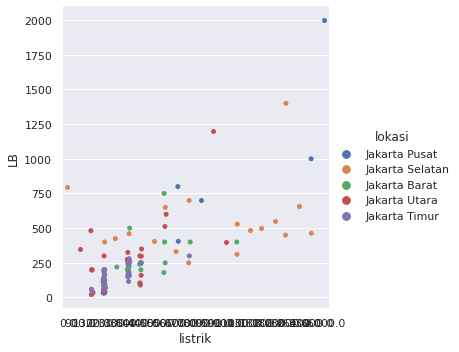

In [ ]:
p= sns.catplot(x="listrik", y="LB", hue="lokasi", data=jakarta)

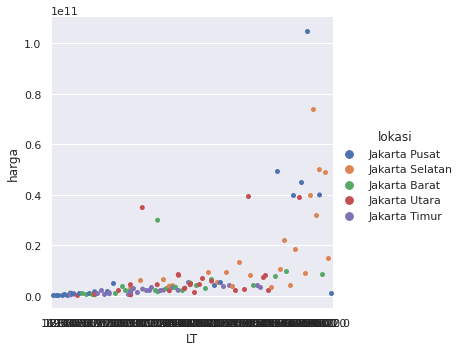

In [ ]:
p= sns.catplot(x="LT", y="harga", hue="lokasi", data=jakarta)

Kami menyarankan perusahaan untuk membeli rumah yang berlokasi di Jakarta Pusat yang memiliki luas tanah paling tinggi dengan harga rendah, karena rumah dengan tanah yang luas dapat dimanfaatkan untuk membangun berbagai fasilitas yang dibutuhkan atau untuk membuka usaha. Selain itu, rumah tersebut memiliki lokasi yang sangat strategis yaitu di Jakarta Pusat, dimana Jakarta Pusat adalah wilayah Jakarta yang paling banyak pengunjungnya.

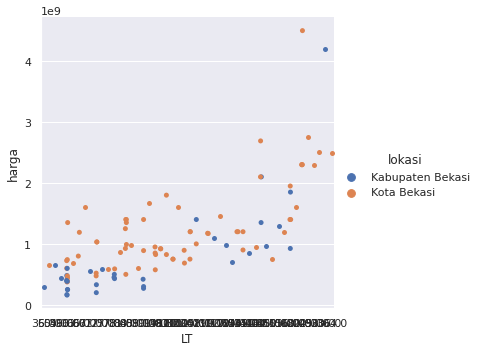

In [ ]:
p= sns.catplot(x="LT", y="harga", hue="lokasi", data=bekasi)

Berdasarkan data yang berlokasi di bekasi setelah kami visualisasikan, yaitu ketergantungan antara luas tanah dan harga dapat kita asumsikan bahwa rumah yang berlokasi di kota bekasi yang cenderung memiliki harga di bawah 2M, tetapi luas tanahnya merentang dari kecil hingga besar.

Saran dari kami, kami merekomendasikan perusahaan untuk menginvestasikan pada rumah yang berlokasi di kota bekasi dengan harga dibawah 2M yang memiliki LT yang lebih luas, karena tanah yang lebih luas dapat dibuat fasilitas tambahan untuk rumah tersebut.

Kami tidak merekomendasikan satu rumah yang memiliki harga diatas 4M, karena masih terdapat rumah dengan luas yang hampir sama bahkan lebih namun dengan harga yang jauh lebih murah.

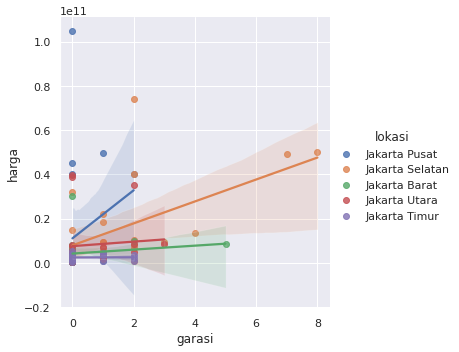

In [ ]:
sns.lmplot(x="garasi", y="harga", hue='lokasi', data=jakarta);

Berdasarkan visuaisasi di atas, kami merekomendasikan rumah dengan harga yang terjangkau di lokasi Jakarta Selatan dengan jumlah garasi sebanyak 8 buah. Lalu, kami tidak merekomendasikan membeli rumah di daerah Jakarta Pusat karena terdapat rumah dengan harga yang tinggi dengan fasilitas yang kurang memadai berupa tidak adanya garasi.

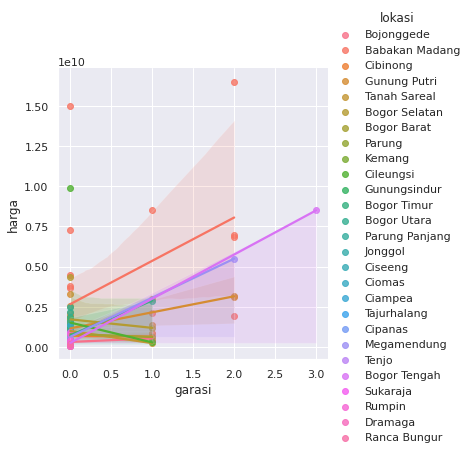

In [ ]:
sns.lmplot(x="garasi", y="harga", hue='lokasi', data=bogor);

Berdasarkan visuaisasi di atas, kami merekomendasikan rumah dengan harga yang terjangkau di lokasi daerah Tenjo dengan jumlah garasi sebanyak 3 buah. Lalu, kami tidak merekomendasikan membeli rumah di daerah Babakan dan Cibinong karena rata-rata harga rumah di daerah tersebut tergolong sedikit mahal dari daerah yang lainnya dengan fasilitas garasi yang didapat.

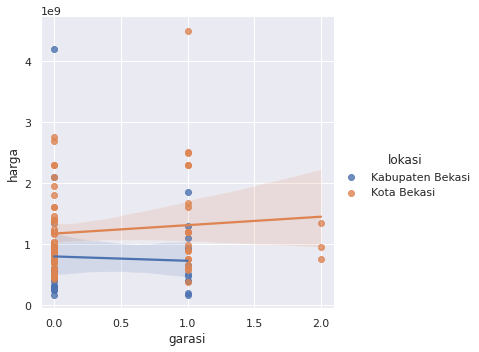

In [ ]:
sns.lmplot(x="garasi", y="harga", hue='lokasi', data=bekasi);

>> Berdasarkan visualisasi di atas, harga rata-rata rumah di Kota Bekasi dengan fasilitas garasi yang didapat lebih mahal dibandingkan dengan Kabupaten Bekasi. 
Berdasarkan visualisasi di atas, kami merekomendasikan ada 3 rumah di daerah Koa Bekasi yang memiliki harga yang murah dan memiliki jumlah garasi yang lebih banyak.

In [ ]:
# garbungkan ketiga data
df = jakarta.merge(bogor, how="outer")
df = df.merge(bekasi, how="outer")

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
# kolom = ["LT","LB", "KT", "KM","garasi","carport","sertifikat"]
for col in ['LT','LB', 'KT', 'KM','garasi','carport', 'harga']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 713732
Jumlah baris setelah memfilter outlier: 136


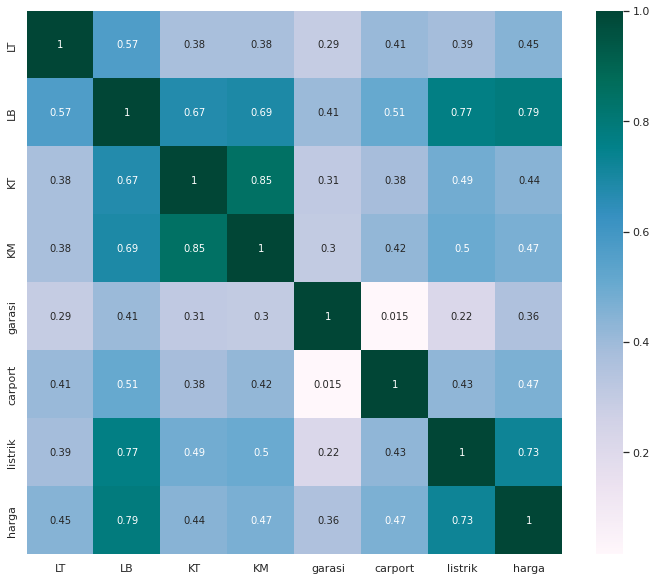

In [ ]:
df = pd.merge(jakarta, bogor, how="outer")
df = df.merge(bekasi, how='outer')
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True, cmap='PuBuGn')

>> Berdasarkan tabel korelasi diatas, dapat disimpulkan bahwa luas bangunan dengan harga yang memiliki tingkat korelasi tinggi dan cenderung memiliki hubungan yang kuat. Hal ini menunjukkan bahwa harga rumah dipengaruhi oleh luas bangunannya.

**Kesimpulan**

>> Kesimpulan: Berdasarkan tabel korelasi diatas dapat disimpulkan bahwa luas bangunan dengan harga memiliki hubungan yang kuat. Hal ini menunjukkan bahwa harga rumah dipengaruhi oleh luas bangunannya. 
>> Kami merekomendasikan rumah di daerah kabupaten Bekasi karena memilki harga yang cenderung lebih murah dibandingkan dengan Kota Bekasi, hal ini dipengaruhi oleh beberapa faktor, diantaranya ialah Kabupaten termasuk daerah yang dekat dengan pedesaan dan memiiki lokasi dengan tanah yang luas dan memiliki nuansa yang nyaman untuk ditinggali oleh para pensiunan. 